# Imports and Setup

In [1]:
%load_ext autoreload
import os
import numpy as np

import instance_halos as ph

import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
# %matplotlib notebook
%load_ext autoreload
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

import logging
# logging.getLogger().setLevel(logging.INFO) # uncomment for some timing output
# logging.getLogger().setLevel(logging.DEBUG) # uncomment for a lot of output

ph.predictions.limit_tensorflow_GPU_memory(GPU_percent_mem_use=0.2)

2023-11-17 13:01:45.625975: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Limit GPU memory :  9553.822096000002 MB /  47769.11048 MB


2023-11-17 13:01:47.383474: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-17 13:01:47.384538: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-11-17 13:01:47.395313: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:d8:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2023-11-17 13:01:47.395345: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-11-17 13:01:47.397150: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-11-17 13:01:47.397204: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-1

In [2]:
path_save_results = None
ngrid_out = 64

# Load Inputs

In [3]:
data_path = "/dipc_storage/dlopez/Projects/instance_halos_data"
# data_path = os.path.join(os.path.abspath(os.path.join(ph.__path__[0], os.pardir)), 'instance_halos_data')
simulation_name = "Planck13_N256_L50.0_output_seed1609"
delta = np.load(os.path.join(data_path, simulation_name, "linear_density_field.npy"))
potential = np.load(os.path.join(data_path, simulation_name, "linear_potential.npy"))

In [4]:
# delta = np.load("/dipc_storage/dlopez/Projects/instance_halos_data/experiments/delta_1024.npy")[0]
# potential = np.load("/dipc_storage/dlopez/Projects/instance_halos_data/experiments/potential_1024.npy")[0]

### Plot input fields

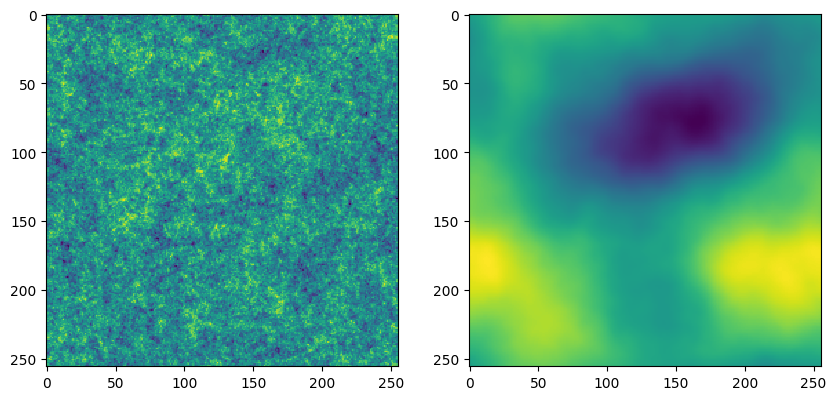

In [5]:
fig, axs = mpl.pyplot.subplots(1,2,figsize=(5*2,5))
axs[0].imshow(delta[0], interpolation='nearest')
axs[1].imshow(potential[0], interpolation='nearest')

# Semantic predictions

### Load semantic model

In [6]:
model_semantic, config = ph.predictions.load_model("semantic_v1.0")

2023-11-17 13:01:48.004766: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 13:01:48.007692: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-11-17 13:01:48.008986: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:d8:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2023-11-17 13:01:48.009028: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-11-17 13:01:48.009051: I tensorflow/stream_executor/platform/def

### Extract input field crops for semantic predictions

In [7]:
fields_semantic = ph.predictions.define_inputs_for_model(model_semantic, delta=delta, potential=potential, ngrid_out=ngrid_out)

### Predict semantic crops

In [8]:
semantics = np.zeros((fields_semantic.shape[0],) + model_semantic.output_shape[1:-1])
for ii in range(fields_semantic.shape[0]):
    print("Semantic crop "+str(ii+1)+"/"+str(fields_semantic.shape[0]))
    semantics[ii:ii+1] = model_semantic.predict(fields_semantic[ii:ii+1], batch_size=1)[..., 0]

Semantic crop 1/64


2023-11-17 13:02:03.298354: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-11-17 13:02:03.298859: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2700000000 Hz
2023-11-17 13:02:03.664204: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-11-17 13:02:04.976252: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-11-17 13:02:05.163505: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-11-17 13:02:06.218341: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


Semantic crop 2/64
Semantic crop 3/64
Semantic crop 4/64
Semantic crop 5/64
Semantic crop 6/64
Semantic crop 7/64
Semantic crop 8/64
Semantic crop 9/64
Semantic crop 10/64
Semantic crop 11/64
Semantic crop 12/64
Semantic crop 13/64
Semantic crop 14/64
Semantic crop 15/64
Semantic crop 16/64
Semantic crop 17/64
Semantic crop 18/64
Semantic crop 19/64
Semantic crop 20/64
Semantic crop 21/64
Semantic crop 22/64
Semantic crop 23/64
Semantic crop 24/64
Semantic crop 25/64
Semantic crop 26/64
Semantic crop 27/64
Semantic crop 28/64
Semantic crop 29/64
Semantic crop 30/64
Semantic crop 31/64
Semantic crop 32/64
Semantic crop 33/64
Semantic crop 34/64
Semantic crop 35/64
Semantic crop 36/64
Semantic crop 37/64
Semantic crop 38/64
Semantic crop 39/64
Semantic crop 40/64
Semantic crop 41/64
Semantic crop 42/64
Semantic crop 43/64
Semantic crop 44/64
Semantic crop 45/64
Semantic crop 46/64
Semantic crop 47/64
Semantic crop 48/64
Semantic crop 49/64
Semantic crop 50/64
Semantic crop 51/64
Semantic

### Assemble semantic crops

In [9]:
ngrid_mod = model_semantic.output_shape[1]
lim = (ngrid_mod//2 - ngrid_out//2, ngrid_mod//2 + ngrid_out//2)
semantic = ph.predictions.assemble_cube_grid(semantics[:, lim[0]:lim[1], lim[0]:lim[1], lim[0]:lim[1]])

### Save/Load semantic prediction

In [10]:
if path_save_results != None:
    path_save_semantic = os.path.join(path_save_results, "test_semantic.npy")
    np.save(path_save_semantic, semantic)
    semantic = np.load(path_save_semantic)

### Plot semantic

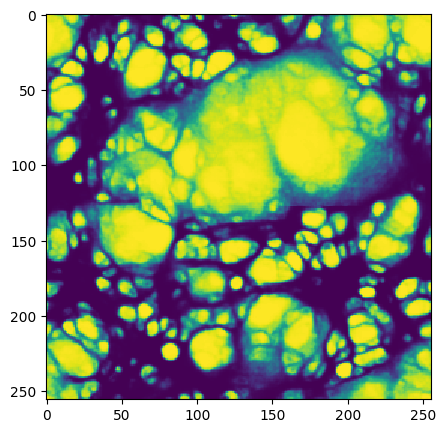

In [11]:
fig, ax = mpl.pyplot.subplots(1,1,figsize=(5,5))
ax.imshow(semantic[0], interpolation='nearest')

# Instance predictions

### Load instance model

In [12]:
model_instance, config = ph.predictions.load_model("instance_v1.0")
sem_thresh = 0.589

## Predict instance lattice 1

### Extract input field crops for instace predictions (lattice 1)

In [13]:
offset1 = ngrid_out//2
fields_instance1, mask_instance1 = ph.predictions.define_inputs_for_model(
    model_instance, delta=delta, potential=potential, append_lag_pos=True,
    ngrid_out=ngrid_out, get_output_mask=semantic>sem_thresh, offset=offset1
)

### Predict instance pseudo-space crops (lattice 1)

In [14]:
pseudos1 = np.zeros((fields_instance1.shape[0],) + model_instance.output_shape[1:])
for ii in range(fields_instance1.shape[0]):
    print("Pseudo crop "+str(ii+1)+"/"+str(fields_instance1.shape[0]))
    pseudos1[ii:ii+1] = model_instance.predict(fields_instance1[ii:ii+1], batch_size=1)

Pseudo crop 1/64
Pseudo crop 2/64
Pseudo crop 3/64
Pseudo crop 4/64
Pseudo crop 5/64
Pseudo crop 6/64
Pseudo crop 7/64
Pseudo crop 8/64
Pseudo crop 9/64
Pseudo crop 10/64
Pseudo crop 11/64
Pseudo crop 12/64
Pseudo crop 13/64
Pseudo crop 14/64
Pseudo crop 15/64
Pseudo crop 16/64
Pseudo crop 17/64
Pseudo crop 18/64
Pseudo crop 19/64
Pseudo crop 20/64
Pseudo crop 21/64
Pseudo crop 22/64
Pseudo crop 23/64
Pseudo crop 24/64
Pseudo crop 25/64
Pseudo crop 26/64
Pseudo crop 27/64
Pseudo crop 28/64
Pseudo crop 29/64
Pseudo crop 30/64
Pseudo crop 31/64
Pseudo crop 32/64
Pseudo crop 33/64
Pseudo crop 34/64
Pseudo crop 35/64
Pseudo crop 36/64
Pseudo crop 37/64
Pseudo crop 38/64
Pseudo crop 39/64
Pseudo crop 40/64
Pseudo crop 41/64
Pseudo crop 42/64
Pseudo crop 43/64
Pseudo crop 44/64
Pseudo crop 45/64
Pseudo crop 46/64
Pseudo crop 47/64
Pseudo crop 48/64
Pseudo crop 49/64
Pseudo crop 50/64
Pseudo crop 51/64
Pseudo crop 52/64
Pseudo crop 53/64
Pseudo crop 54/64
Pseudo crop 55/64
Pseudo crop 56/64
P

### Save/Load instance pseudo-space crops (lattice 1)

In [15]:
if path_save_results != None:
    path_save_pseudos1 = os.path.join(path_save_results, "test_pseudos1.npy")
    np.save(path_save_pseudos1, pseudos1)
    pseudos1 = np.load(path_save_pseudos1)

### Plot pseudo-space example (lattice 1)

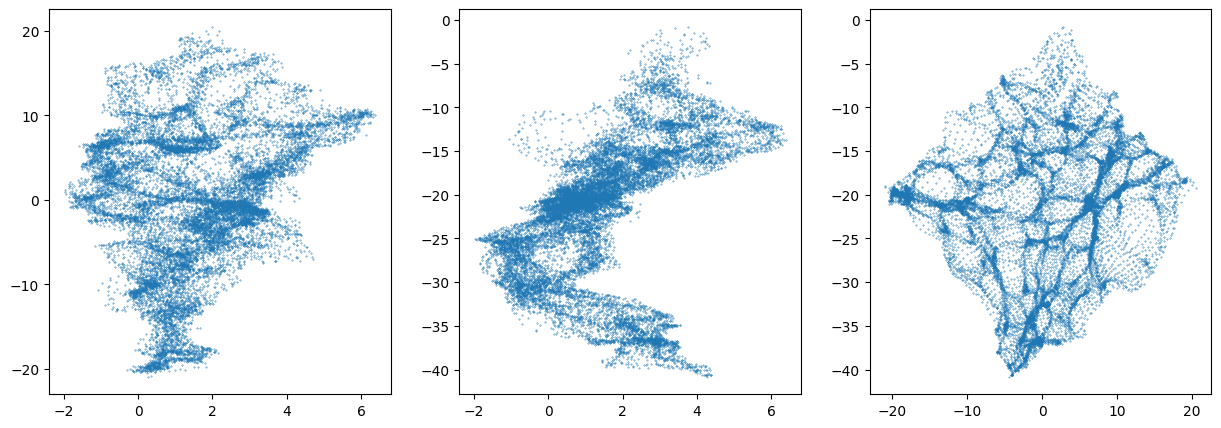

In [16]:
fig, axs = mpl.pyplot.subplots(1,3,figsize=(3*5,5))
axs[0].scatter(pseudos1[0, 0, ..., 0], pseudos1[0, 0, ..., 1], s=0.1)
axs[1].scatter(pseudos1[0, 0, ..., 0], pseudos1[0, 0, ..., 2], s=0.1)
axs[2].scatter(pseudos1[0, 0, ..., 1], pseudos1[0, 0, ..., 2], s=0.1)

### Predict instance maps clustering pseudo-space crops (lattice 1)

In [17]:
pred_crops1 = np.zeros(pseudos1.shape[:-1])
for ii in range(0, len(pseudos1)):
    print("Clustering instance crop "+str(ii+1)+"/"+str(len(pseudos1)))
    pred_crops1[ii,mask_instance1[ii]] = 1+ph.predictions.clustering.meshfree_descending_clustering(pseudos1[ii,mask_instance1[ii]])

Clustering instance crop 1/64
Clustering instance crop 2/64
Clustering instance crop 3/64
Clustering instance crop 4/64
Clustering instance crop 5/64
Clustering instance crop 6/64
Clustering instance crop 7/64
Clustering instance crop 8/64
Clustering instance crop 9/64
Clustering instance crop 10/64
Clustering instance crop 11/64
Clustering instance crop 12/64
Clustering instance crop 13/64
Clustering instance crop 14/64
Clustering instance crop 15/64
Clustering instance crop 16/64
Clustering instance crop 17/64
Clustering instance crop 18/64
Clustering instance crop 19/64
Clustering instance crop 20/64
Clustering instance crop 21/64
Clustering instance crop 22/64
Clustering instance crop 23/64
Clustering instance crop 24/64
Clustering instance crop 25/64
Clustering instance crop 26/64
Clustering instance crop 27/64
Clustering instance crop 28/64
Clustering instance crop 29/64
Clustering instance crop 30/64
Clustering instance crop 31/64
Clustering instance crop 32/64
Clustering instan

### Save/Load instance map crops (lattice 1)

In [18]:
if path_save_results != None:
    path_save_pred_crops1 = os.path.join(path_save_results, "test_pred_crops1.npy")
    np.save(path_save_pred_crops1, pred_crops1)
    pred_crops1 = np.load(path_save_pred_crops1)

### Plot instance map example (lattice 1)

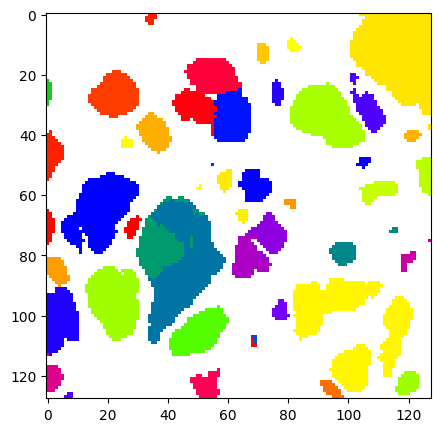

In [19]:
fig, ax = mpl.pyplot.subplots(1,1,figsize=(5,5))
tmp_imshow = pred_crops1[0,0] % 137
alpha = np.zeros(tmp_imshow.shape); alpha[tmp_imshow!=0]=1
cb = ax.imshow(tmp_imshow, alpha=alpha, cmap='prism', interpolation='nearest')

### Assemble instance crops (lattice 1)

In [20]:
ngrid_mod = pred_crops1.shape[1]
lim = (ngrid_mod//2 - ngrid_out//2, ngrid_mod//2 + ngrid_out//2)
instance_grid1 = ph.predictions.assemble_labeled_cube_grid(pred_crops1[:, lim[0]:lim[1], lim[0]:lim[1], lim[0]:lim[1]])
print("Assemble Labeled Grid")
instance_grid1 = np.roll(instance_grid1, (offset1-ngrid_out//2, offset1-ngrid_out//2, offset1-ngrid_out//2), axis=(0, 1, 2))

Assemble Labeled Grid


### Save/Load instance map (lattice 1)

In [21]:
if path_save_results != None:
    path_save_instance_grid1 = os.path.join(path_save_results, "test_instance_grid1.npy")
    np.save(path_save_instance_grid1, instance_grid1)
    instance_grid1 = np.load(path_save_instance_grid1)

### Plot instance map (lattice 1)

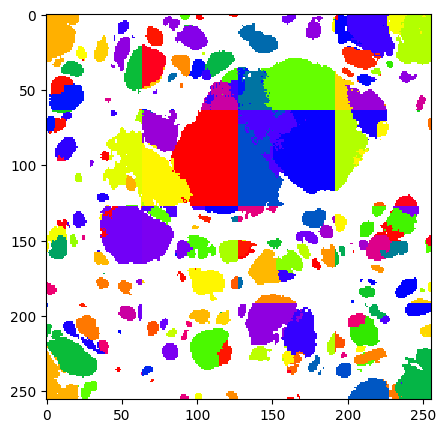

In [38]:
fig, ax = mpl.pyplot.subplots(1,1,figsize=(5,5))
tmp_imshow = instance_grid1[0] % 137
alpha = np.zeros(tmp_imshow.shape); alpha[tmp_imshow!=0]=1
cb = ax.imshow(tmp_imshow, alpha=alpha, cmap='prism', interpolation='nearest')

## Predict instance lattice 2

### Extract input field crops for instace predictions (lattice 2)

In [23]:
offset2 = 0
fields_instance2, mask_instance2 = ph.predictions.define_inputs_for_model(
    model_instance, delta=delta, potential=potential, append_lag_pos=True,
    ngrid_out=ngrid_out, get_output_mask=semantic>sem_thresh, offset=offset2
)

### Predict instance pseudo-space crops (lattice 2)

In [24]:
pseudos2 = np.zeros((fields_instance2.shape[0],) + model_instance.output_shape[1:])
for ii in range(fields_instance2.shape[0]):
    print("Pseudo crop "+str(ii+1)+"/"+str(fields_instance2.shape[0]))
    pseudos2[ii:ii+1] = model_instance.predict(fields_instance2[ii:ii+1], batch_size=1)

Pseudo crop 1/64
Pseudo crop 2/64
Pseudo crop 3/64
Pseudo crop 4/64
Pseudo crop 5/64
Pseudo crop 6/64
Pseudo crop 7/64
Pseudo crop 8/64
Pseudo crop 9/64
Pseudo crop 10/64
Pseudo crop 11/64
Pseudo crop 12/64
Pseudo crop 13/64
Pseudo crop 14/64
Pseudo crop 15/64
Pseudo crop 16/64
Pseudo crop 17/64
Pseudo crop 18/64
Pseudo crop 19/64
Pseudo crop 20/64
Pseudo crop 21/64
Pseudo crop 22/64
Pseudo crop 23/64
Pseudo crop 24/64
Pseudo crop 25/64
Pseudo crop 26/64
Pseudo crop 27/64
Pseudo crop 28/64
Pseudo crop 29/64
Pseudo crop 30/64
Pseudo crop 31/64
Pseudo crop 32/64
Pseudo crop 33/64
Pseudo crop 34/64
Pseudo crop 35/64
Pseudo crop 36/64
Pseudo crop 37/64
Pseudo crop 38/64
Pseudo crop 39/64
Pseudo crop 40/64
Pseudo crop 41/64
Pseudo crop 42/64
Pseudo crop 43/64
Pseudo crop 44/64
Pseudo crop 45/64
Pseudo crop 46/64
Pseudo crop 47/64
Pseudo crop 48/64
Pseudo crop 49/64
Pseudo crop 50/64
Pseudo crop 51/64
Pseudo crop 52/64
Pseudo crop 53/64
Pseudo crop 54/64
Pseudo crop 55/64
Pseudo crop 56/64
P

### Save/Load instance pseudo-space crops (lattice 2)

In [25]:
if path_save_results != None:
    path_save_pseudos2 = os.path.join(path_save_results, "test_pseudos2.npy")
    np.save(path_save_pseudos2, pseudos2)
    pseudos2 = np.load(path_save_pseudos2)

### Plot pseudo-space example (lattice 1)

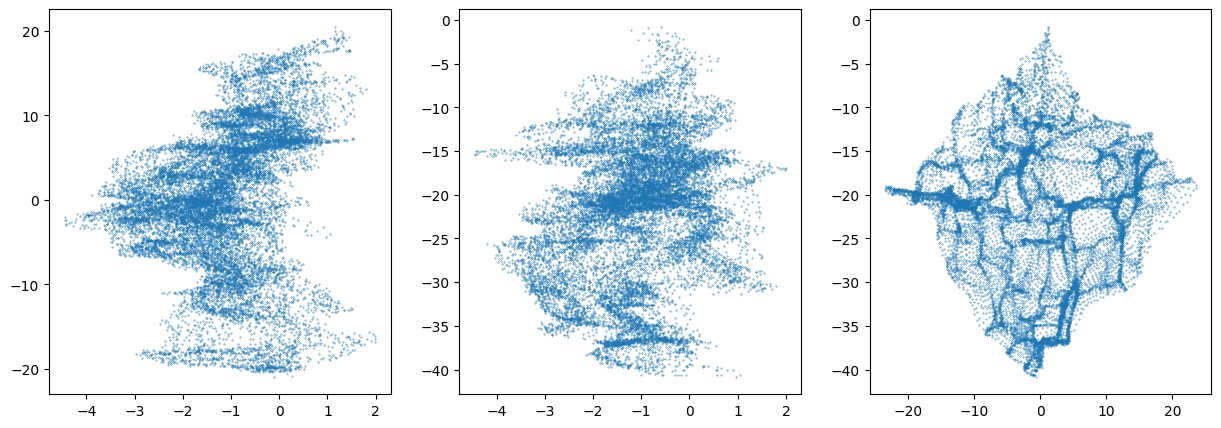

In [26]:
fig, axs = mpl.pyplot.subplots(1,3,figsize=(3*5,5))
axs[0].scatter(pseudos2[0, 0, ..., 0], pseudos1[0, 0, ..., 1], s=0.1)
axs[1].scatter(pseudos2[0, 0, ..., 0], pseudos1[0, 0, ..., 2], s=0.1)
axs[2].scatter(pseudos2[0, 0, ..., 1], pseudos1[0, 0, ..., 2], s=0.1)

### Predict instance maps clustering pseudo-space crops (lattice 2)

In [27]:
pred_crops2 = np.zeros(pseudos2.shape[:-1])
for ii in range(0, len(pseudos2)):
    print("Clustering instance crop "+str(ii+1)+"/"+str(len(pseudos2)))
    pred_crops2[ii,mask_instance2[ii]] = 1+ph.predictions.clustering.meshfree_descending_clustering(pseudos2[ii,mask_instance2[ii]])

Clustering instance crop 1/64
Clustering instance crop 2/64
Clustering instance crop 3/64
Clustering instance crop 4/64
Clustering instance crop 5/64
Clustering instance crop 6/64
Clustering instance crop 7/64
Clustering instance crop 8/64
Clustering instance crop 9/64
Clustering instance crop 10/64
Clustering instance crop 11/64
Clustering instance crop 12/64
Clustering instance crop 13/64
Clustering instance crop 14/64
Clustering instance crop 15/64
Clustering instance crop 16/64
Clustering instance crop 17/64
Clustering instance crop 18/64
Clustering instance crop 19/64
Clustering instance crop 20/64
Clustering instance crop 21/64
Clustering instance crop 22/64
Clustering instance crop 23/64
Clustering instance crop 24/64
Clustering instance crop 25/64
Clustering instance crop 26/64
Clustering instance crop 27/64
Clustering instance crop 28/64
Clustering instance crop 29/64
Clustering instance crop 30/64
Clustering instance crop 31/64
Clustering instance crop 32/64
Clustering instan

### Save/Load instance map crops (lattice 2)

In [28]:
if path_save_results != None:
    path_save_pred_crops2 = os.path.join(path_save_results, "test_pred_crops2.npy")
    np.save(path_save_pred_crops2, pred_crops2)
    pred_crops2 = np.load(path_save_pred_crops2)

### Plot instance map example (lattice 2)

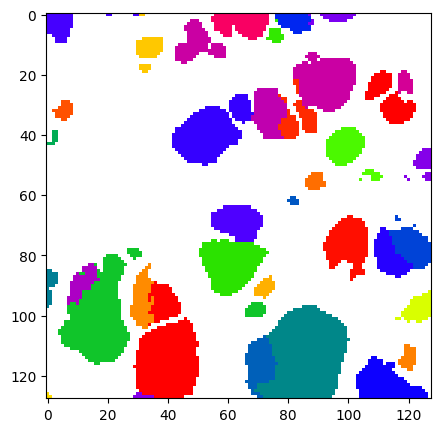

In [29]:
fig, ax = mpl.pyplot.subplots(1,1,figsize=(5,5))
tmp_imshow = pred_crops2[0,0] % 137
alpha = np.zeros(tmp_imshow.shape); alpha[tmp_imshow!=0]=1
cb = ax.imshow(tmp_imshow, alpha=alpha, cmap='prism', interpolation='nearest')

### Assemble instance crops (lattice 2)

In [30]:
ngrid_mod = pred_crops2.shape[1]
lim = (ngrid_mod//2 - ngrid_out//2, ngrid_mod//2 + ngrid_out//2)
instance_grid2 = ph.predictions.assemble_labeled_cube_grid(pred_crops2[:, lim[0]:lim[1], lim[0]:lim[1], lim[0]:lim[1]])
print("Assemble Labeled Grid")
instance_grid2 = np.roll(instance_grid2, (offset2-ngrid_out//2, offset2-ngrid_out//2, offset2-ngrid_out//2), axis=(0, 1, 2))

Assemble Labeled Grid


### Save/Load instance map (lattice 2)

In [31]:
if path_save_results != None:
    path_save_instance_grid2 = os.path.join(path_save_results, "test_instance_grid2.npy")
    np.save(path_save_instance_grid2, instance_grid2)
    instance_grid2 = np.load(path_save_instance_grid2)

### Plot instance map (lattice 2)

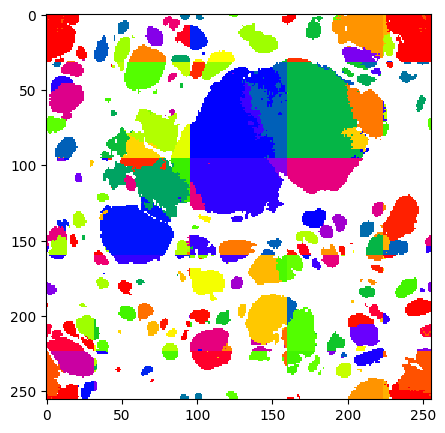

In [37]:
fig, ax = mpl.pyplot.subplots(1,1,figsize=(5,5))
tmp_imshow = instance_grid2[0] % 137
alpha = np.zeros(tmp_imshow.shape); alpha[tmp_imshow!=0]=1
cb = ax.imshow(tmp_imshow, alpha=alpha, cmap='prism', interpolation='nearest')

## Assemble Instance map

In [33]:
instance = ph.predictions.combine_instance_labeled_lattices(instance_grid1, instance_grid2, quadrant_size=ngrid_out//2)

### Save/Load instance prediction

In [34]:
if path_save_results != None:
    path_save_instance = os.path.join(path_save_results, "test_instance.npy")
    np.save(path_save_instance, instance)
    instance = np.load(path_save_instance)

### Plot Instance

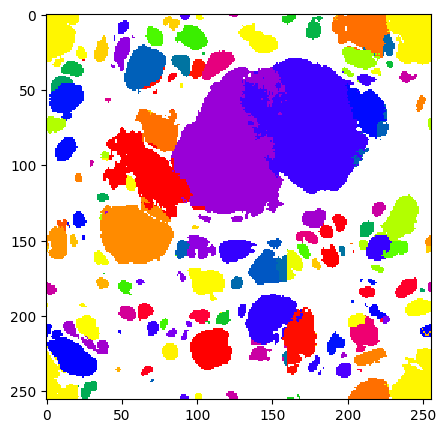

In [35]:
fig, ax = mpl.pyplot.subplots(1,1,figsize=(5,5))
tmp_imshow = instance[0] % 137
alpha = np.zeros(tmp_imshow.shape); alpha[tmp_imshow!=0]=1
cb = ax.imshow(tmp_imshow, alpha=alpha, cmap='prism', interpolation='nearest')

/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_IHs/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1183: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_IHs/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1184: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_IHs/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1105: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/lscratch/dlopez/programs/miniconda_20221210/miniconda3/envs/VE_IHs/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1106: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


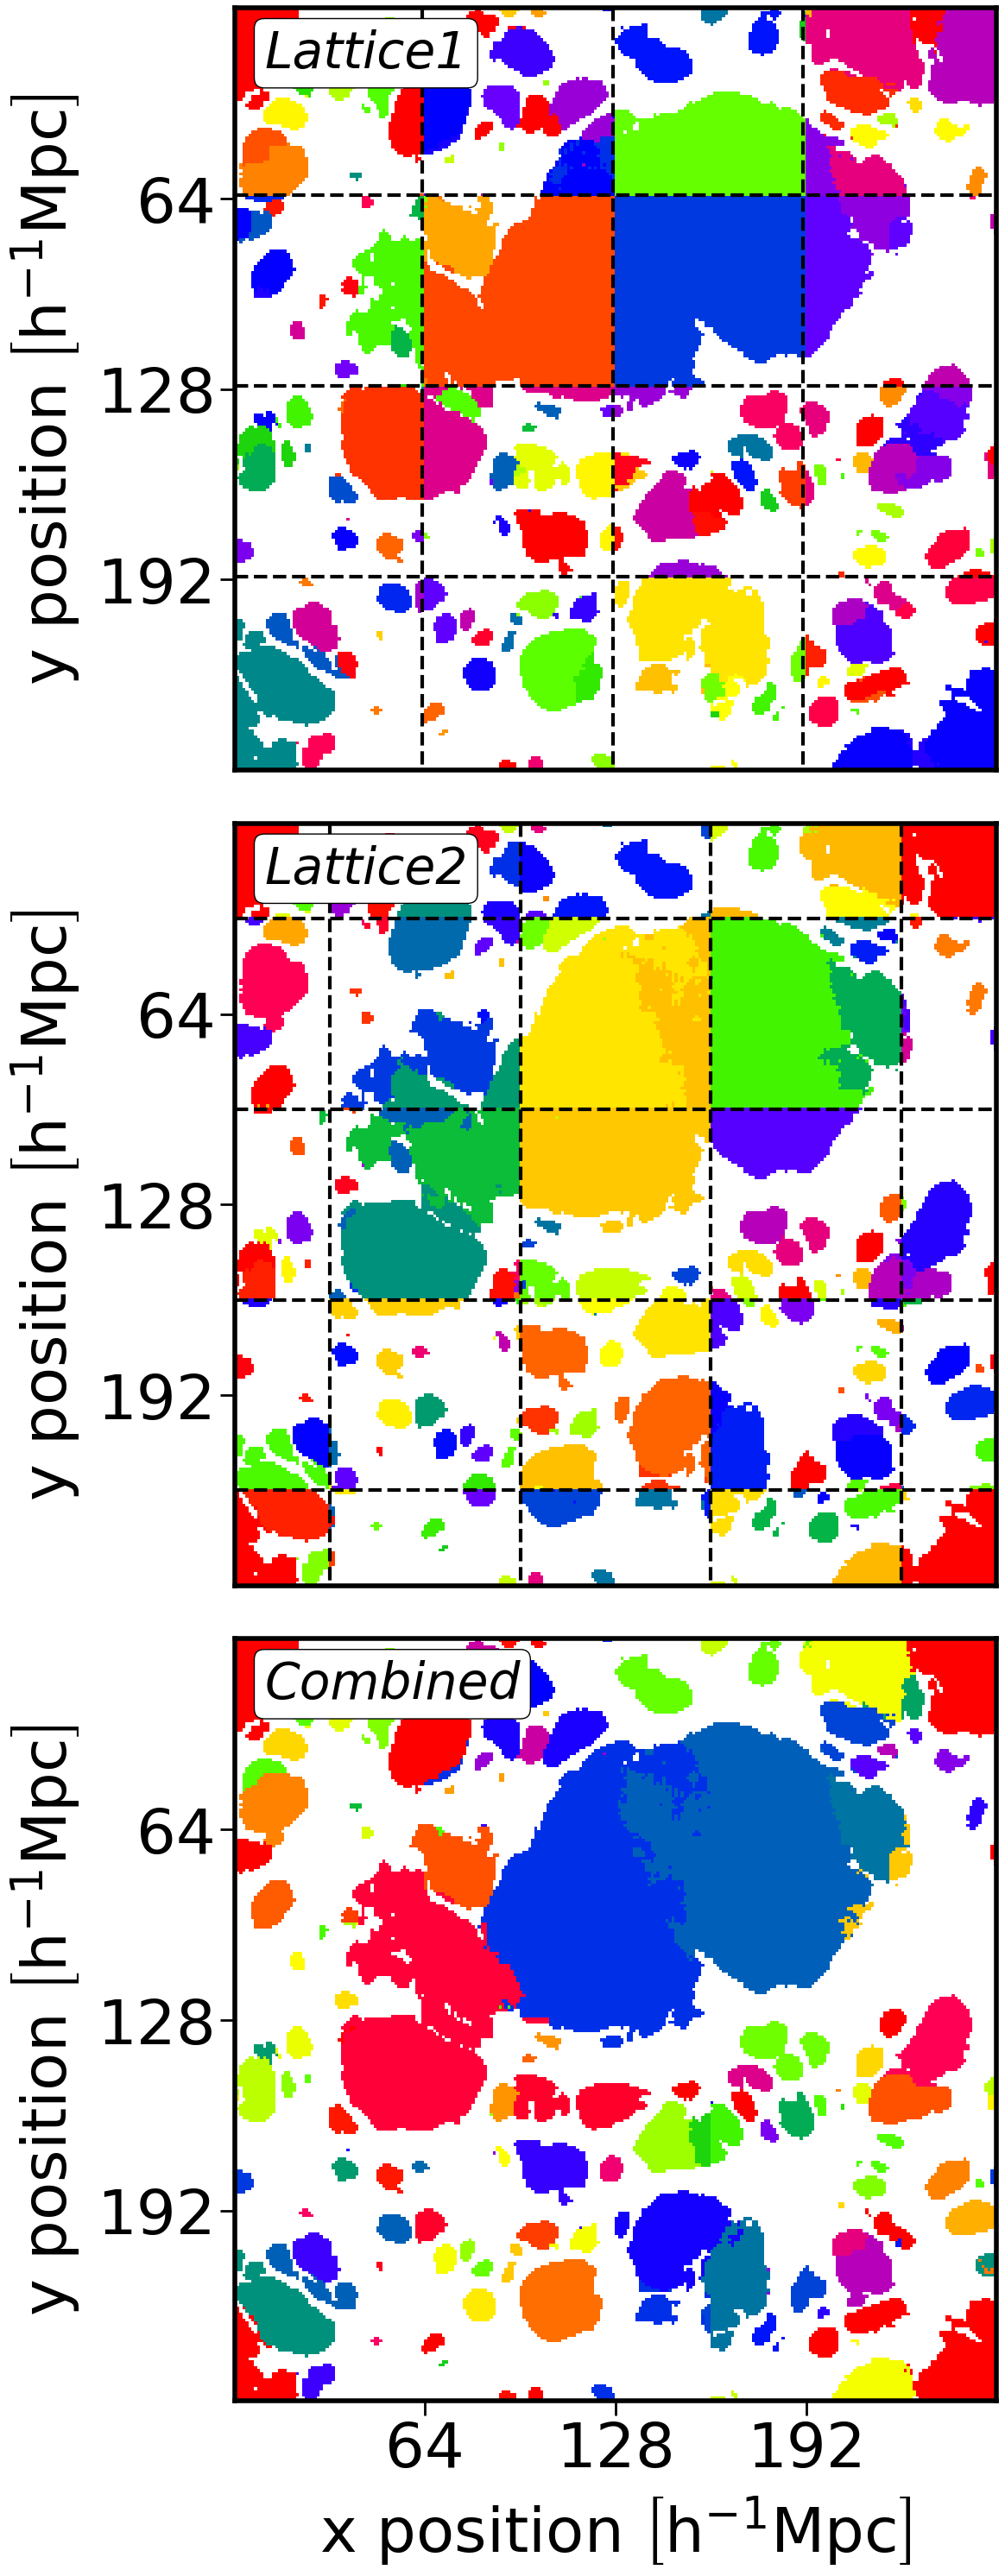

In [36]:
fig = ph.utils.plot_example_combination_lattices({0 : instance_grid1, 1 : instance_grid2, 2 : instance})